In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,MeanShift,estimate_bandwidth
from sklearn import metrics

data = pd.read_csv('/content/drive/MyDrive/datasets/Happiness Index.csv')
x = data.iloc[:,2]
y = data.iloc[:,7]

data = list(zip(x,y))
data = [list(i) for i in data]
data = np.array(data)


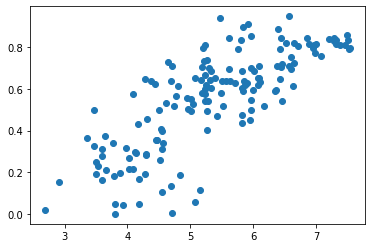

In [24]:
plt.scatter(data[:,0],data[:,1],marker='o')

In [20]:
kmeans = KMeans(init='k-means++',n_clusters=2,n_init=10)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

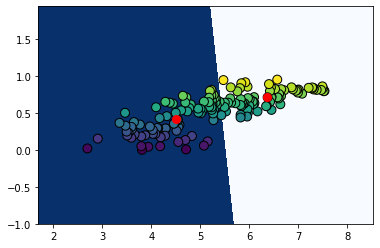

In [21]:
xmin,xmax = min(data[:,0])-1.0,max(data[:,0])+1.0
ymin,ymax = min(data[:,1])-1.0,max(data[:,1])+1.0
xdata,ydata = np.meshgrid(np.arange(xmin,xmax,0.01),np.arange(ymin,ymax,0.01))
mesh_output = kmeans.predict(np.c_[xdata.ravel(),ydata.ravel()])
mesh_output = mesh_output.reshape(xdata.shape)
plt.pcolormesh(xdata,ydata,mesh_output,cmap=plt.cm.Blues)
plt.scatter(data[:,0],data[:,1],linewidths=1,c=y,s=80,edgecolors='black')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],color='r',facecolor='red',linewidths=3,zorder=10)


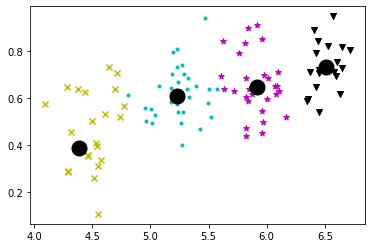

In [26]:
bandwidth = estimate_bandwidth(data,quantile=0.1,n_samples=len(data))
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(data)

labels = ms.labels_
centroids = ms.cluster_centers_

markers = '.*xv'
colors = "cmyk"
n = len(centroids)
for i,marker,color in zip(range(n),markers,colors):
  plt.scatter(data[labels==i,0],data[labels==i,1],marker=marker,color=color)
  centroid = centroids[i]
  plt.plot(centroid[0],centroid[1],marker='o',markersize=15,color="black")